In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_file = "/workspaces/Minerva-Discovery/my_experiments/sam_original/exec_experiment_2/results/experiment-f3_experiment_20250107_211810/experiment_log.csv"
df = pd.read_csv(log_file)
df.head()

,ratio,experiment_num,facie,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,0,tensor(0.0439),tensor(0.0082),0.205277,tensor(0.9699),tensor(0.9915),0.890243
1,0.01,0,1,tensor(0.0623),tensor(0.0108),0.149578,tensor(0.9232),tensor(0.9784),0.819066
2,0.01,0,2,tensor(0.0646),tensor(0.0107),0.470179,tensor(0.9661),tensor(0.9909),0.871901
3,0.01,0,3,tensor(0.0766),tensor(0.0040),0.304077,tensor(0.8628),tensor(0.9857),0.743495
4,0.01,0,4,tensor(0.0908),tensor(0.0019),0.519314,tensor(0.7214),tensor(0.9823),0.581086


In [3]:
# Convertendo colunas tensor para float
df['ratio'] = pd.to_numeric(df['ratio'], errors='coerce')
df['val_loss_epoch'] = df['val_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_loss_epoch'] = df['train_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_loss_epoch'] = df['test_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['val_mIoU'] = df['val_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_mIoU'] = df['train_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_mIoU'] = df['test_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)

In [4]:
df.head()

,ratio,experiment_num,facie,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,0,0.0439,0.0082,0.205277,0.9699,0.9915,0.890243
1,0.01,0,1,0.0623,0.0108,0.149578,0.9232,0.9784,0.819066
2,0.01,0,2,0.0646,0.0107,0.470179,0.9661,0.9909,0.871901
3,0.01,0,3,0.0766,0.0040,0.304077,0.8628,0.9857,0.743495
4,0.01,0,4,0.0908,0.0019,0.519314,0.7214,0.9823,0.581086


In [5]:
# Agrupando por 'ratio' e 'facie' e calculando média e desvio padrão
grouped = df.groupby(['ratio', 'facie'], as_index=False).agg({
    'train_loss_epoch': ['mean', 'std'],
    'val_loss_epoch': ['mean', 'std'],
    'test_loss_epoch': ['mean', 'std'],
    'train_mIoU': ['mean', 'std'],
    'val_mIoU': ['mean', 'std'],
    'test_mIoU': ['mean', 'std'],
})

# Ajustando os nomes das colunas após o agrupamento
grouped.columns = ['ratio', 'facie',
                   'train_loss_mean', 'train_loss_std',
                   'val_loss_mean', 'val_loss_std',
                   'test_loss_mean', 'test_loss_std',
                   'train_mIoU_mean', 'train_mIoU_std',
                   'val_mIoU_mean', 'val_mIoU_std',
                   'test_mIoU_mean', 'test_mIoU_std']
        
# Exibindo o DataFrame resultante
print(grouped)

    ratio  facie  train_loss_mean  train_loss_std  val_loss_mean  \
0    0.01      0          0.00860        0.000255        0.04420   
1    0.01      1          0.01080        0.001042        0.06428   
2    0.01      2          0.01062        0.000881        0.05976   
3    0.01      3          0.00390        0.000742        0.07414   
4    0.01      4          0.00192        0.000130        0.08594   
5    0.01      5          0.00944        0.019823        0.04570   
6    1.00      0          0.00112        0.000045        0.00496   
7    1.00      1          0.00250        0.000000        0.01024   
8    1.00      2          0.00228        0.000045        0.00760   
9    1.00      3          0.00142        0.000084        0.00452   
10   1.00      4          0.00080        0.000071        0.00220   
11   1.00      5          0.00028        0.000045        0.00052   

    val_loss_std  test_loss_mean  test_loss_std  train_mIoU_mean  \
0       0.001925        0.242798       0.024132

In [6]:
grouped

,ratio,facie,train_loss_mean,train_loss_std,val_loss_mean,val_loss_std,test_loss_mean,test_loss_std,train_mIoU_mean,train_mIoU_std,val_mIoU_mean,val_mIoU_std,test_mIoU_mean,test_mIoU_std
0,0.01,0,0.00860,0.000255,0.04420,0.001925,0.242798,0.024132,0.98378,0.016593,0.96894,0.002902,0.878341,0.008497
1,0.01,1,0.01080,0.001042,0.06428,0.003572,0.153363,0.009509,0.97840,0.002175,0.92184,0.001557,0.817150,0.004410
2,0.01,2,0.01062,0.000881,0.05976,0.003334,0.409018,0.054656,0.99084,0.000844,0.96722,0.000960,0.879987,0.007801
3,0.01,3,0.00390,0.000742,0.07414,0.004480,0.314682,0.012049,0.98558,0.003032,0.86722,0.005302,0.738093,0.011948
4,0.01,4,0.00192,0.000130,0.08594,0.012008,0.470648,0.084063,0.98164,0.001228,0.73556,0.009495,0.586554,0.020520
5,0.01,5,0.00944,0.019823,0.04570,0.005803,0.293851,0.116439,0.96174,0.074653,0.83704,0.030881,0.534483,0.008984
6,1.00,0,0.00112,0.000045,0.00496,0.000055,0.190416,0.026455,0.99870,0.000000,0.99708,0.000045,0.962357,0.004645
7,1.00,1,0.00250,0.000000,0.01024,0.000055,0.279187,0.010096,0.99454,0.000055,0.98774,0.000089,0.894033,0.001615
8,1.00,2,0.00228,0.000045,0.00760,0.000122,0.679185,0.085543,0.99792,0.000045,0.99578,0.000045,0.926695,0.006212
9,1.00,3,0.00142,0.000084,0.00452,0.000110,0.557753,0.042970,0.99322,0.000259,0.98706,0.000152,0.801029,0.005972


/tmp/ipykernel_408475/3271170230.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


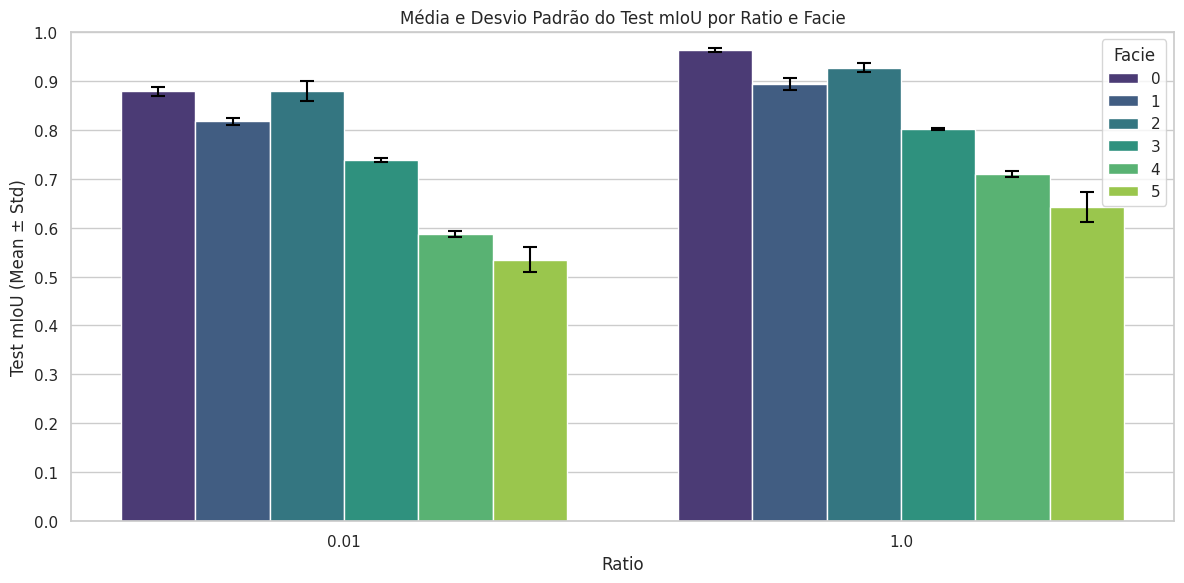

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurando o estilo
sns.set(style="whitegrid")

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando as médias com desvio padrão, agrupando por ratio
barplot = sns.barplot(
    data=grouped,
    x='ratio',  # Eixo X será o ratio
    y='test_mIoU_mean',  # Valores de média
    hue='facie',  # Diferencia pelas facies
    ci=None,  # Desativa o intervalo de confiança
    palette='viridis',  # Paleta de cores
    capsize=0.1,  # Tamanho das extremidades das barras de erro
    errwidth=1.5  # Largura das barras de erro
)

# Adicionando desvio padrão como linhas de erro
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()  # Altura (média)
    error = grouped.iloc[i]['test_mIoU_std']  # Desvio padrão correspondente
    barplot.errorbar(
        x=bar.get_x() + bar.get_width() / 2,  # Posição no eixo X
        y=height,  # Valor no eixo Y (média)
        yerr=error,  # Desvio padrão
        fmt='none',  # Formato para não exibir marcador
        color='black',  # Cor da linha de erro
        capsize=5,  # Tamanho das extremidades das barras de erro
        elinewidth=1.5,  # Largura da linha de erro
        capthick=1.5  # Espessura das extremidades
    )

# Ajustando a escala do eixo Y de 0 a 1, de 0.1 em 0.1
plt.ylim(0, 1)  # Limita os valores do eixo Y
plt.yticks(np.arange(0, 1.1, 0.1))  # Define os ticks do eixo Y de 0 a 1 com intervalo de 0.1

# Personalização do gráfico
plt.title('Média e Desvio Padrão do Test mIoU por Ratio e Facie')
plt.xlabel('Ratio')
plt.ylabel('Test mIoU (Mean ± Std)')
plt.legend(title='Facie')

# Exibindo o gráfico
plt.tight_layout()
plt.show()